# **Food Classifier**
* **This is mini-experiment that I've done after finishing Lecture `01` and `02` of `FastAI course`.**
* **Classifying between `Sushi / Steak / Pizza`**
* **DATASET used for fine-tuning: [`pizza_steak_sushi.zip`](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/data) From the Pytorch Tutorial By [`Daniel Bourke`](https://www.learnpytorch.io/04_pytorch_custom_datasets/)**

In [8]:
# Unzipping the DATA.zip folder:

!unzip DATA.zip 
# !unzip DATA.zip -d DATA

Archive:  DATA.zip
   creating: DATA/pizza_steak_sushi/
   creating: DATA/pizza_steak_sushi/test/
   creating: DATA/pizza_steak_sushi/test/pizza/
  inflating: DATA/pizza_steak_sushi/test/pizza/1152100.jpg  
  inflating: DATA/pizza_steak_sushi/test/pizza/1503858.jpg  
  inflating: DATA/pizza_steak_sushi/test/pizza/1687143.jpg  
  inflating: DATA/pizza_steak_sushi/test/pizza/1925494.jpg  
  inflating: DATA/pizza_steak_sushi/test/pizza/194643.jpg  
  inflating: DATA/pizza_steak_sushi/test/pizza/195160.jpg  
  inflating: DATA/pizza_steak_sushi/test/pizza/2003290.jpg  
  inflating: DATA/pizza_steak_sushi/test/pizza/2019408.jpg  
  inflating: DATA/pizza_steak_sushi/test/pizza/2111981.jpg  
  inflating: DATA/pizza_steak_sushi/test/pizza/2124579.jpg  
  inflating: DATA/pizza_steak_sushi/test/pizza/2218680.jpg  
  inflating: DATA/pizza_steak_sushi/test/pizza/2236338.jpg  
  inflating: DATA/pizza_steak_sushi/test/pizza/2508636.jpg  
  inflating: DATA/pizza_steak_sushi/test/pizza/2871261.jpg  
  

In [1]:
import os
CURRENT_WORKING_DIR = os.getcwd()
CURRENT_WORKING_DIR 

'e:\\RESUME\\Fastai_FoodClassifier'

In [2]:
TRAIN_DATA_PATH = os.path.join(CURRENT_WORKING_DIR, 'DATA', 'pizza_steak_sushi', 'train')
os.listdir(TRAIN_DATA_PATH)

['pizza', 'steak', 'sushi']

In [3]:
FOOD_OPTIONS = os.listdir(TRAIN_DATA_PATH)
FOOD_OPTIONS

['pizza', 'steak', 'sushi']

## **Viewing Random Food image From the Training Dataset**

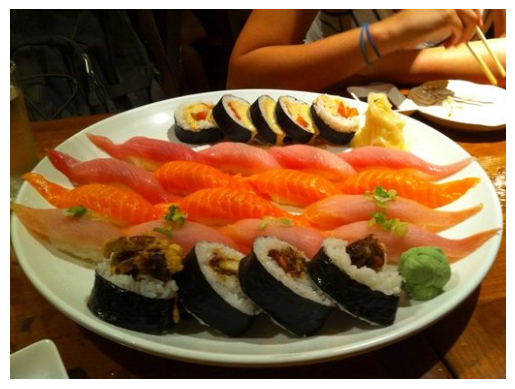

In [46]:
import os
import random
import cv2 as cv
import matplotlib.pyplot as plt

DATASET_DIR = os.path.join(CURRENT_WORKING_DIR, 'DATA', 'pizza_steak_sushi', 'train')
food_types = os.listdir(DATASET_DIR)

random_bear_type_select = random.randint(0, (len(food_types) - 1)) # index
selected_type = food_types[random_bear_type_select]
random_bear_select = random.randint(0, (len(os.listdir(DATASET_DIR + '/' + selected_type)) - 1))

img_path = os.path.join(DATASET_DIR, selected_type, os.listdir(DATASET_DIR + '/' + selected_type)[random_bear_select])
img = cv.imread(img_path)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Show-Img |:|-->
plt.axis('off')
plt.imshow(img);

## **Model-Dev**

In [8]:
from fastai.vision.all import *

In [9]:
DATASET_DIR = os.path.join(CURRENT_WORKING_DIR, 'DATA', 'pizza_steak_sushi', 'train')

* **To paste from vim registers, do: `"<reg_num>p`** <br>
    `e.g`: `"8p` pastes from register 8.

In [17]:
# # doc(untar_data)
# doc(get_image_files)
doc(verify_images)
# get_image_files(DATASET_DIR)

In [18]:
verify_images?

Signature: verify_images(fns)
Docstring: Find images in `fns` that can't be opened
File:      e:\internship\ongc\using_deeplearning\table-transformer\env\lib\site-packages\fastai\vision\utils.py
Type:      function

### **DataLoading**

In [29]:
food_dataloader = ImageDataLoaders.from_folder(DATASET_DIR, 
                                               train='.', 
                                               valid_pct=0.2, 
                                               item_tfms=Resize(224))

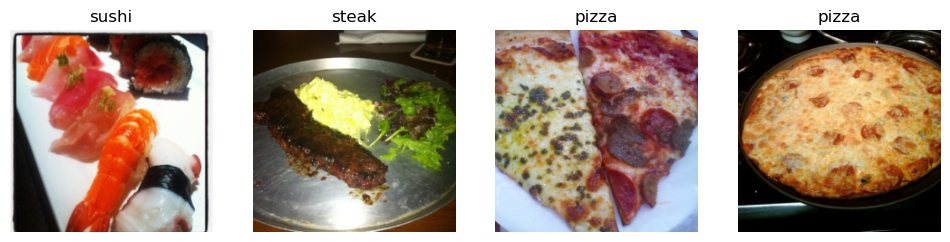

In [11]:
# Viewing Samples
food_dataloader.show_batch(max_n=4, nrows = 1)

### **Fine-Tuning**

In [21]:
doc(vision_learner)

In [22]:
learn.fine_tune?

Object `learn.fine_tune` not found.


In [30]:
# Fine-Tuning:
learn = vision_learner(dls=food_dataloader, 
                       arch=resnet34, 
                       metrics=[accuracy, error_rate])
learn.fine_tune(epochs=3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.810316,1.580178,0.466667,0.533333,00:01


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.529773,1.164795,0.577778,0.422222,00:01
1,1.095603,0.845227,0.711111,0.288889,00:01
2,0.793286,0.712113,0.822222,0.177778,00:01


### **Checking predictions after 3 epoch** 

In [13]:
import os
import random
import cv2 as cv
import matplotlib.pyplot as plt
from typing import Literal

def random_FoodImg(on_data: Optional[Literal['train', 'test']] = 'train'):
    DATASET_DIR = os.path.join(CURRENT_WORKING_DIR, 'DATA', 'pizza_steak_sushi', on_data)
    food_types = os.listdir(DATASET_DIR)

    random_bear_type_select = random.randint(0, (len(food_types) - 1)) # index
    selected_type = food_types[random_bear_type_select]
    random_bear_select = random.randint(0, (len(os.listdir(DATASET_DIR + '/' + selected_type)) - 1))

    img_path = os.path.join(DATASET_DIR, selected_type, os.listdir(DATASET_DIR + '/' + selected_type)[random_bear_select])
    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    return img_path, img

Food Detected: sushi
FoodIndex: 2
Probabilites: tensor([7.9106e-04, 9.7603e-03, 9.8945e-01])


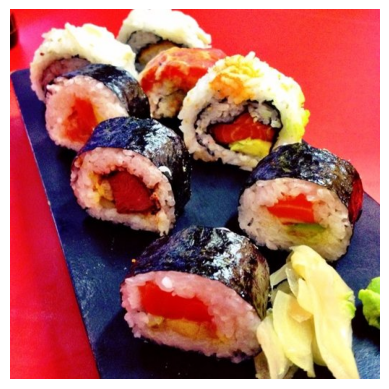

In [44]:
# Testing:
img_path, img = random_FoodImg('test')
food_, food_idx, probs = learn.predict(img_path)

print(f'Food Detected: {food_}\nFoodIndex: {food_idx}')
print(f'Probabilites: {probs}')

plt.axis('off')
plt.imshow(img);

* **Even though the fine-tuning was only done for 3 epoch, still the model's predictions are quite good. Though sometimes the predictions are wrong. A/c to me increasing the epochs in fine-tuning will fix it.**

## **Exporting the model**

In [57]:
path = os.path.join(os.getcwd(),'mini_food_classifier.pkl')
learn.export(fname=path)

## **Loading exported model**

In [61]:
learn_inference = load_learner(fname=path)

### **Making predictions with the loaded model**

In [64]:
print(dir(learn_inference))

['T_destination', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__stored_args__', '__str__', '__subclasshook__', '__weakref__', '_apply', '_backward', '_backward_hooks', '_backward_pre_hooks', '_bn_bias_state', '_buffers', '_call_impl', '_call_one', '_compiled_call_impl', '_component_attr_filter', '_default', '_dir', '_do_epoch', '_do_epoch_train', '_do_epoch_validate', '_do_fit', '_do_grad_opt', '_do_one_batch', '_end_cleanup', '_forward_hooks', '_forward_hooks_always_called', '_forward_hooks_with_kwargs', '_forward_pre_hooks', '_forward_pre_hooks_with_kwargs', '_get_backward_hooks', '_get_backward_pre_hooks', '_get_item_by_idx', '_get_name', '_grab_cbs'

In [65]:
doc(learn_inference.predict)

Food Detected: pizza
FoodIndex: 0
Probabilites: tensor([0.9458, 0.0014, 0.0528])


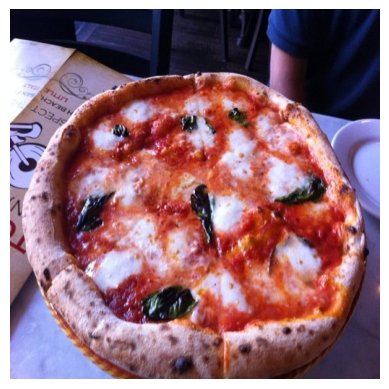

In [67]:
img_path, img = random_FoodImg('test')
food_, food_idx, probs = learn_inference.predict(img_path)

print(f'Food Detected: {food_}\nFoodIndex: {food_idx}')
print(f'Probabilites: {probs}')

plt.axis('off')
plt.imshow(img);